<a href="https://colab.research.google.com/github/Monsoon94/machinlearning/blob/main/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀

In [ ]:
import pandas as pd
import numpy as np
import warnings
#warnings.filterwarnings('ignore')

body=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/refs/heads/main/data/bodyPerformance.csv')
body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
body['gender']=np.where(body['gender']=='M', 0, 1) # 남자이면 0, 여자이면 1
body['class_1']=np.where(body['class']=='A', 1, 0) # class_1을 만듬(이진분류를 위해) A이면 1, 아니면 모두 0
body.head(10)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0
5,36.0,1,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B,0
6,42.0,1,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D,0
7,33.0,0,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,B,0
8,54.0,0,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,C,0
9,28.0,0,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,B,0


In [ ]:
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class', 'class_1'])) # difference : 차집합 함수. class와 class_1을 제외한 모든 컬럼 추출
x=body[feature_columns]
y=body['class_1']



In [ ]:
train_x, test_x, train_y, test_y=train_test_split(x,y,stratify=y, train_size=0.7, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [ ]:
from sklearn.linear_model import LogisticRegression
logR=LogisticRegression()
logR.fit(train_x, train_y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
proba=pd.DataFrame(logR.predict_proba(train_x))
cs=logR.decision_function(train_x)

df=pd.concat([proba, pd.DataFrame(cs)], axis=1)
df.columns=['Not A','A', 'decision_function']

df.sort_values(['decision_function'], inplace=True)
df.reset_index(inplace=True, drop=True)

df.head()

,Not A,A,decision_function
0,1.0,6.535395e-09,-18.846033
1,1.0,3.584708e-08,-17.144004
2,1.0,4.328107e-08,-16.955550
3,1.0,4.874286e-08,-16.836707
4,1.0,6.917845e-08,-16.486576


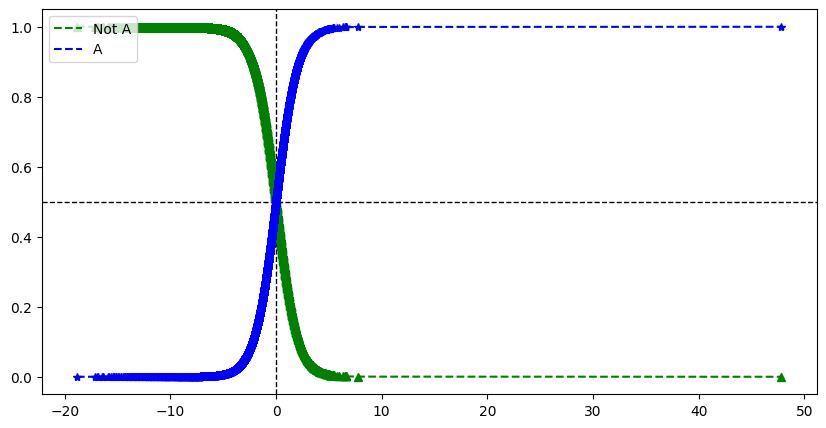

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1)
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)

plt.plot(df['decision_function'], df['Not A'], 'g--', label='Not A')
plt.plot(df['decision_function'], df['Not A'], 'g^')
plt.plot(df['decision_function'], df['A'], 'b--', label='A')
plt.plot(df['decision_function'], df['A'], 'b*')

plt.xlabel
plt.ylabel

plt.legend(loc='upper left')

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred=logR.predict(test_x)

test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y, pred)
test_rcll=recall_score(test_y, pred)
test_f1=f1_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[2768  246]
 [ 352  652]]


정확도	85.12%
정밀도	72.61%
재현율	64.94%
F1	68.56%


In [ ]:
from sklearn.metrics import classification_report

target_names = ['Not A', 'A']
print(classification_report(test_y, pred, target_names=target_names))

'''
정확도 : 0.85.
정밀도 : 0.73
재현율 : 0.65
'''


              precision    recall  f1-score   support

       Not A       0.89      0.92      0.90      3014
           A       0.73      0.65      0.69      1004

    accuracy                           0.85      4018
   macro avg       0.81      0.78      0.79      4018
weighted avg       0.85      0.85      0.85      4018



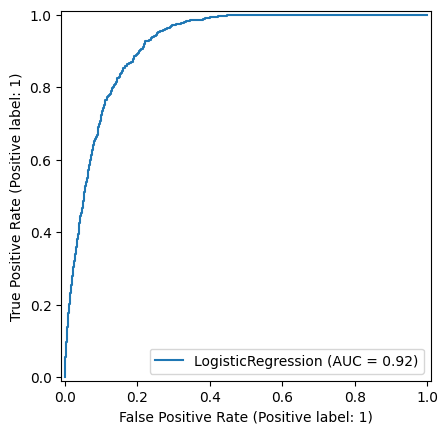

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logR, test_x, test_y)
plt.show()